# l'exploration / la découverte. Travail interactif.
## EDA
### Informations Fichiers 




In [4]:
import pandas as pds
import os

# 1. Obtenir le chemin de la racine du projet
# os.getcwd() renvoie le répertoire de travail actuel.
project_root = os.getcwd()

# 2. Construire le chemin vers le fichier CSV
# On joint la racine avec les sous-dossiers et le nom du fichier.
csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)
# print(Data_File)
print("===== Infos Generales ===== ")
Data_File_Info=Data_File.info()

# print("===== Dimensions ===== ")
# print(Data_File.shape())

# print("===== Sataistiques Decriptives ===== ")
# print(Data_File.describe())

# print("===== Doublons ===== ")
# Data_File_Doublons=Data_File.duplicated().sum()
# print(Data_File_Doublons)

# print("===== Head ===== ")
# Data_File_Head=Data_File.head(3)
# print(Data_File_Head)


===== Infos Generales ===== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

# Analyse Exploratoire et Visualisations   
## 1. La Vue d'Ensemble : Le Heatmap de Corrélation         

===== Obj =====
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


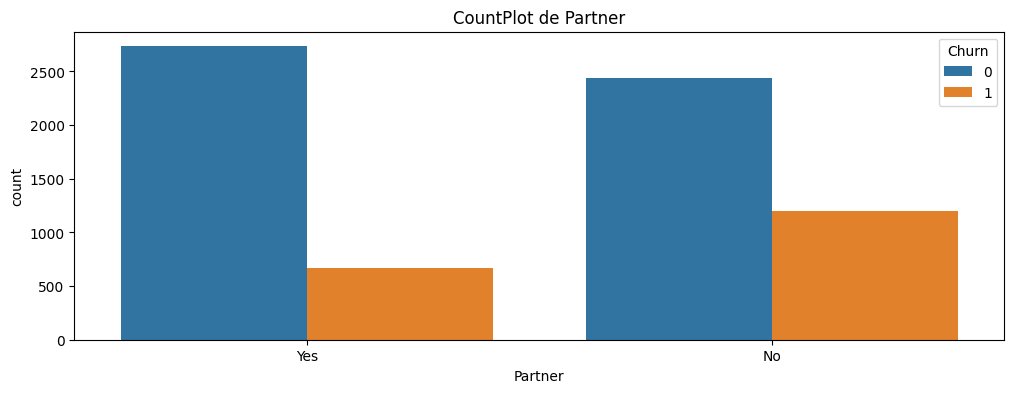

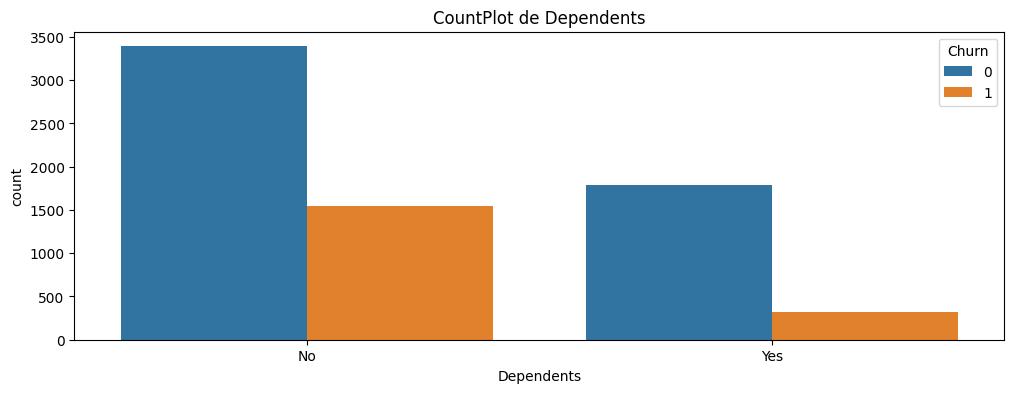

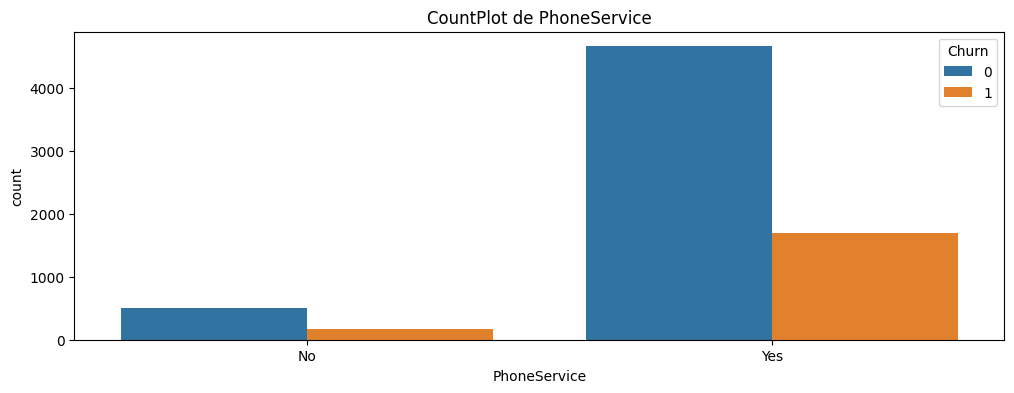

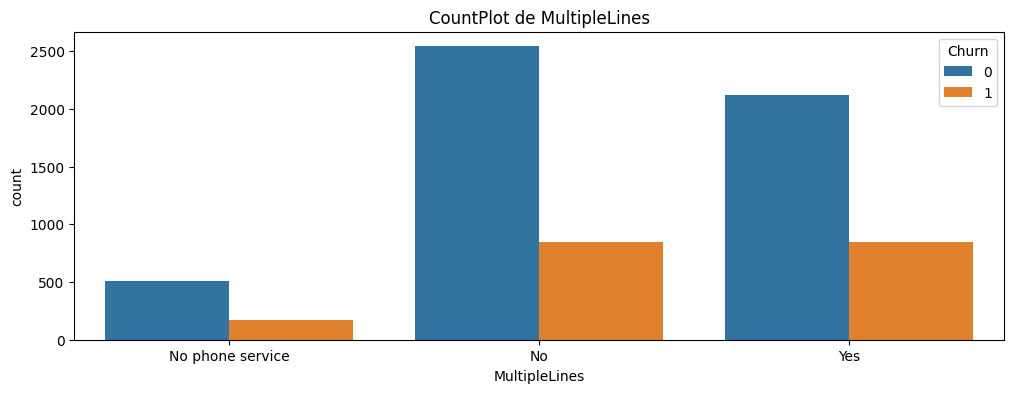

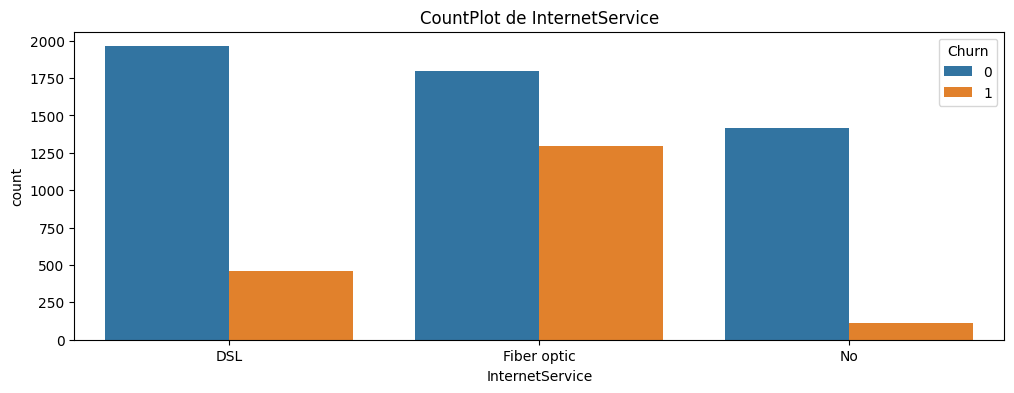

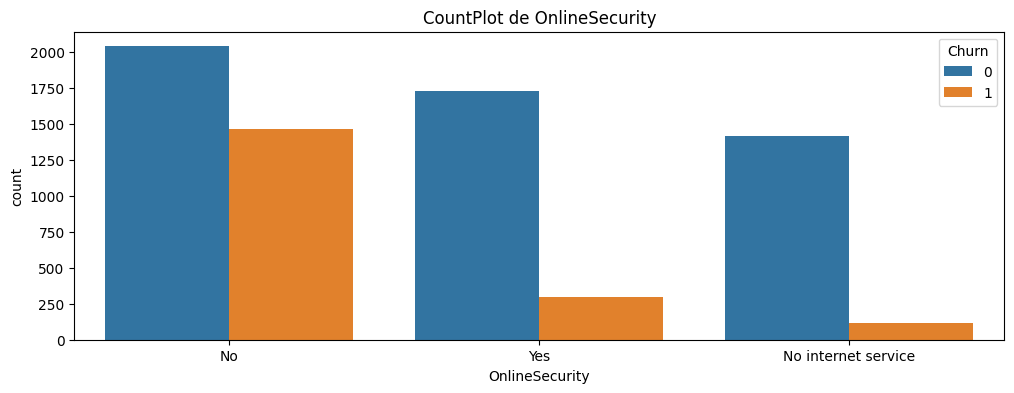

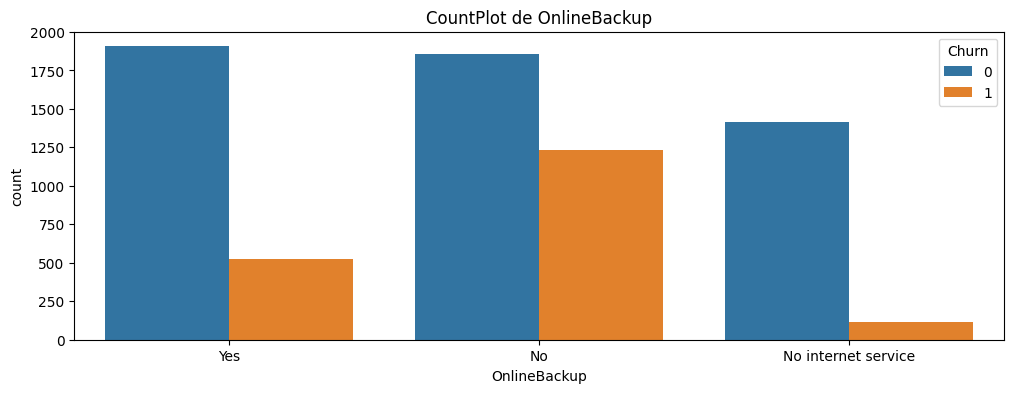

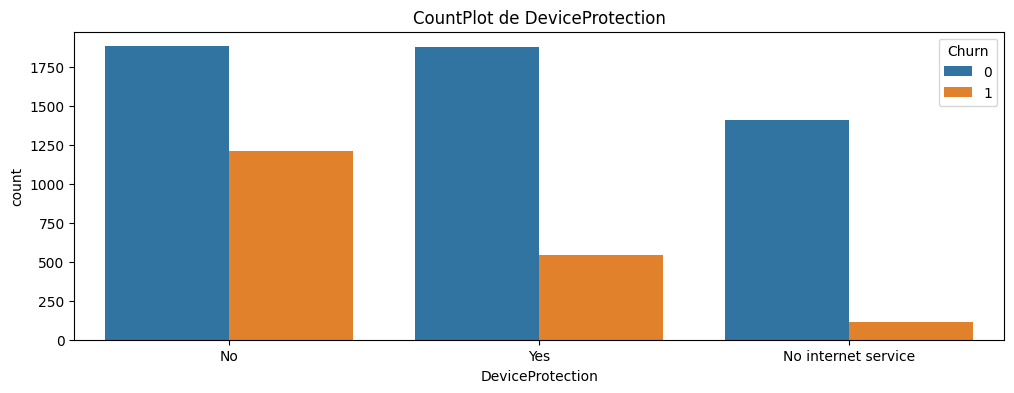

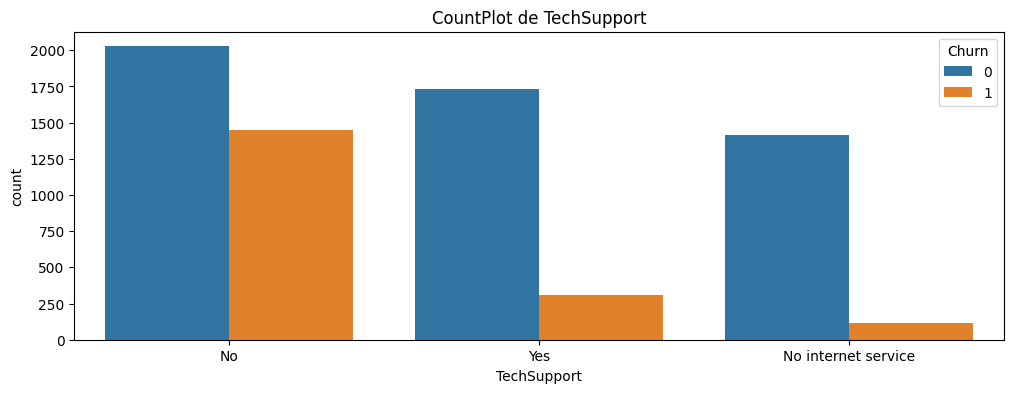

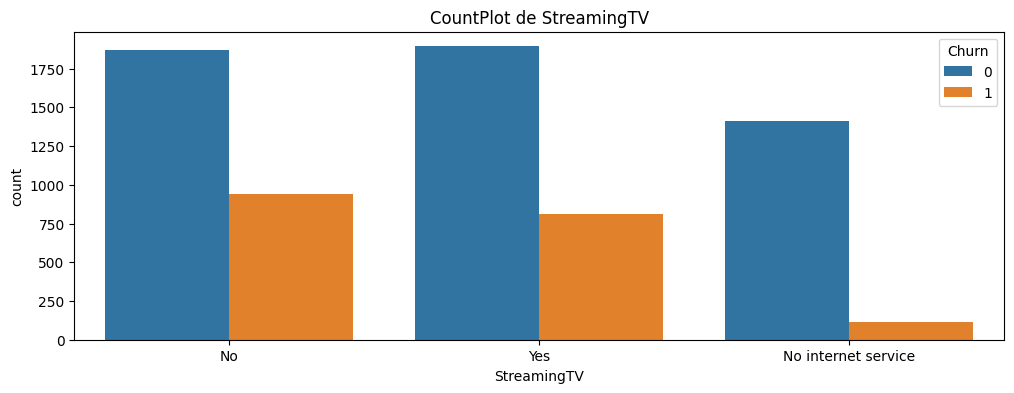

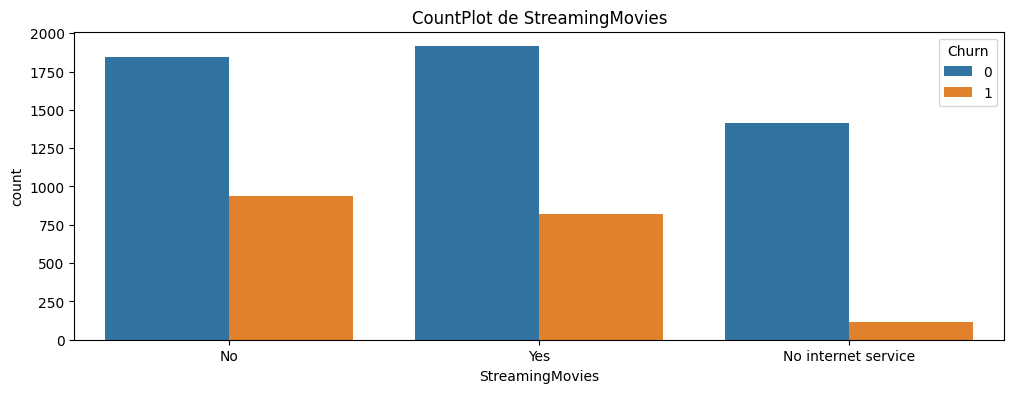

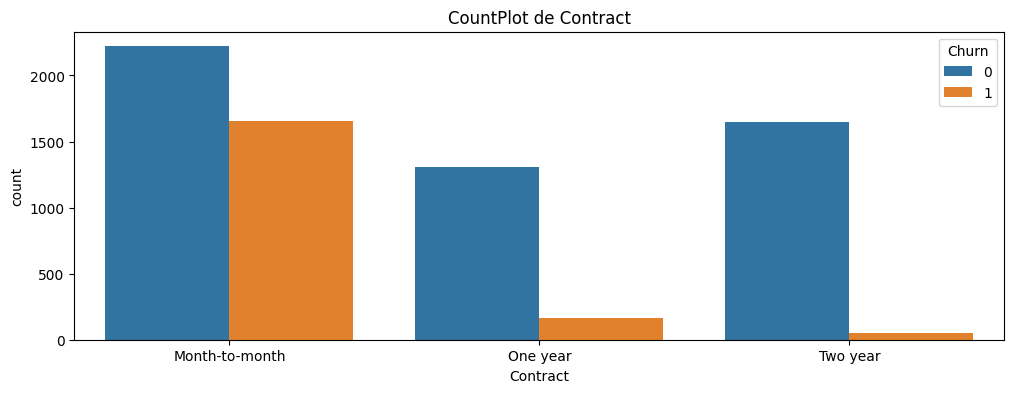

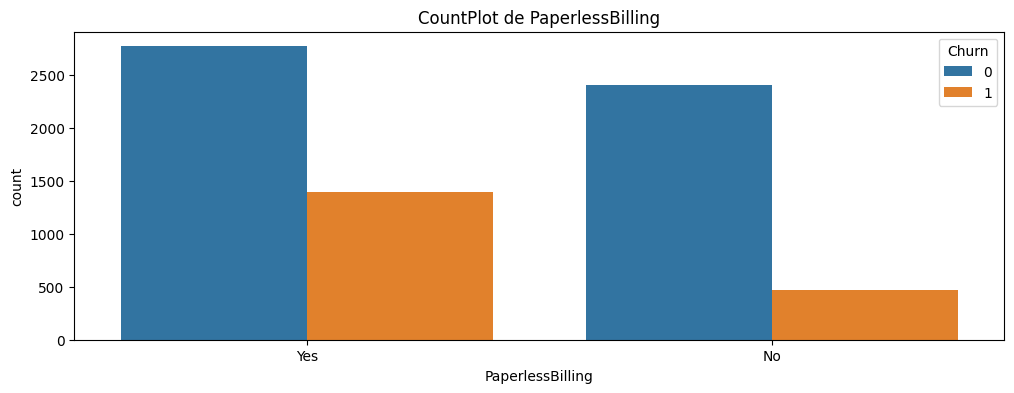

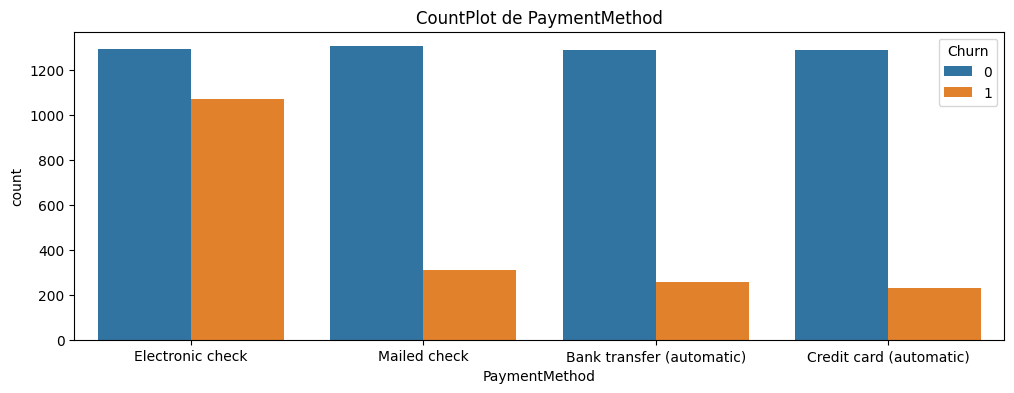

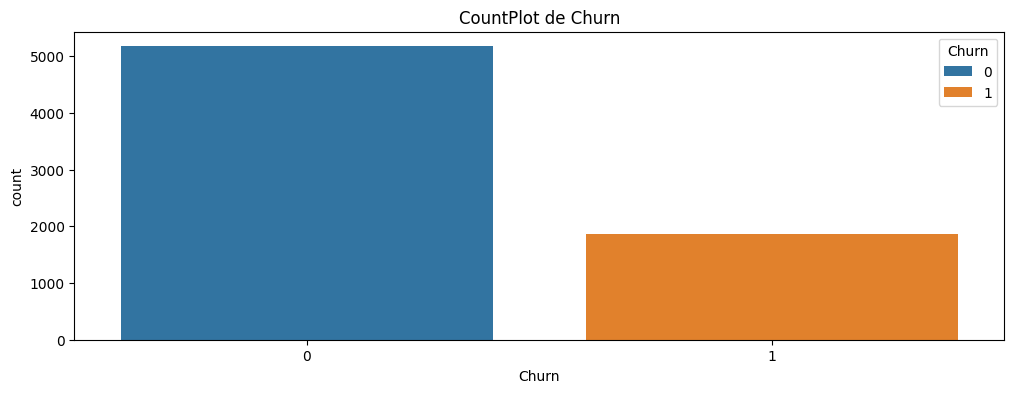

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# import os
# import pandas as pds
import numpy as np



# Data_File_Num=Data_File.select_dtypes(include=np.number)

# print(Data_File_Num)
Data_File_Obj=['Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# print("===== Num =====")
# print(Data_File_Num)

print("===== Obj =====")
print(Data_File_Obj)
# print(f"Nbre d'elements dans Obj : {count(Data_File_Obj)}")


for Col_Obj in Data_File_Obj:
    plt.figure(figsize=(12,4))
    sns.countplot(x=Col_Obj, data=Data_File, hue="Churn" )
    plt.title(f'CountPlot de {Col_Obj}')
    plt.show()



# project_root = os.getcwd()
# csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')
# Data_File=pds.read_csv(csv_path)

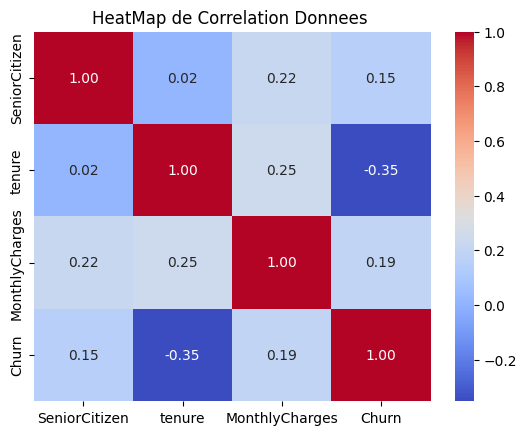

In [ ]:
import os
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

project_root = os.getcwd()

csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)
Data_File['TotalCharges']=pds.to_numeric(Data_File['TotalCharges'], errors='coerce')
Miss_Val=Data_File["TotalCharges"].isnull()
# Data_File["TotalCharges"]=Data_File

#---- Dictionnaire
Churn_Map={'Yes' : 1, 'No' : 0}
Data_File['Churn']=Data_File["Churn"].map(Churn_Map)

# ---- Label Encoder (2e methode)
l_e=LabelEncoder()
Data_File["Churn"]=l_e.fit_transform(Data_File["Churn"])    # df["item"] = Le.fit_transform(df["item"])

Data_File['TotalCharges']=Data_File.fillna(Data_File['TotalCharges'].mean(), inplace=True)  #Missed Values
Data_File['Churn']=pds.to_numeric(Data_File['Churn'], errors='coerce')
Data_File_Num=Data_File.select_dtypes(include=np.number)
sns.heatmap(Data_File_Num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap de Correlation Donnees ")
plt.show()

In [ ]:
Data_

## Encodage des variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pds
import os


Data_File_Obj=['Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

l_ee=LabelEncoder()

project_root = os.getcwd()

csv_path = os.path.join(project_root,'..', 'data', 'raw', 'ChurnDataFile.csv')

Data_File=pds.read_csv(csv_path)

#encodeage
for item in Data_File_Obj:
       Data_File[item]=l_ee.fit_transform(Data_File[item])
       Data_File['Churn']=pds.to_numeric(Data_File['Churn'], errors='coerce')
print("===== Apres l'encodage ======")
print(l_ee.classes_)

# # mappage
# Dict_Map={"Yes" : 1, "No" : 2}
# for item in Data_File_Obj:
#        Data_File[item]=Data_File[item].map(Data_File_Obj)
    
# print("===== Apres l'encodage ======")
# print(l_ee.classes_)

def encode_categorical(dataframe_name):
    from sklearn.preprocessing import LabelEncoder
#     import pandas as pds

    dataframe_encoded = dataframe_name.copy()
    categorical_cols = dataframe_encoded.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        le = LabelEncoder()
        dataframe_encoded[col] = le.fit_transform(dataframe_encoded[col])
    return dataframe_encoded

===== Apres l'encodage ======
['No' 'Yes']
